# Readme: 
# This script characterize each transition of each instrument and insert corresponding features into database

#  
#  

# *Import Model section

In [153]:
%load_ext autoreload
%autoreload 2
# import packages
import pandas as pd
import os
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from data_manipulate_module import load_prepare_data, fill_missing_data, add_time_s, add_time_s_equip_data
from useful_feature_module import sweep_get_std, sweep_get_diff, sweep_get_mean, compute_useful_feature
from waveform_characterizing_module import characterize_pulse
from feature_database_module import init_feature_frame, init_feature_db, read_feature_db, get_operation_list,insert_entry_into_database

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# *Local Utility function

In [8]:
def figure_layout(case_id = 1, font = 'times new roman', weight = 'regular', size = 15):
    # author - D.Q. Huang 201711
    # this function let you define how you want you figure displayed in Ipython Notebook
    # and figure font size, font weight and font style
    # cse_id can only be 1,2,3
    # 1: inline
    # 2: pdf
    # 3: intractive
    if len([case_id]) > 1:
        print('Error: one case one time')
        return -1
    if (case_id == np.array([1,2,3])).sum() == 0:
        print('Error: Case can only be 1,2,or,3')
        return -1
    if case_id == 1:
        %matplotlib notebook
        %matplotlib inline
    elif case_id == 2:
        %matplotlib inline
        from IPython.display import set_matplotlib_formats
        set_matplotlib_formats('pdf')
    elif case_id == 3:
        %matplotlib notebook
    font = {'family' : font,
            'weight' : weight,
            'size'   : size}
    matplotlib.rc('font', **font)

def plot_equip_feature_func(x ='time_sec',y='PC',x_lable='time [s]',y_label='PC',title='YD1',fig_s=[10,5]):
    # author - D.Q. Huang 20180406
    # this function only plot equip data
    # input:
    # x = 'x feature', y = 'feature', 'x_label', 'y_label', 'title', fig_size = []
    plt.figure(figsize=(fig_s[0],fig_s[1]))
    plt.plot(equip_data[x].values, equip_data[y].values, linewidth = 3)
    yy = np.arange(equip_data[y].values.min(),equip_data[y].values.max(),1)
    for ii in range(0, len(operation_data[x])):
        plt.plot(operation_data[x][ii]*np.ones(len(yy)), yy, linewidth = 1,color='red')
    # plt.plot(equip_data_2['PC'].values, linewidth = 3)
    plt.xlabel(x_lable)
    plt.ylabel(y_label)
    plt.title(title)


#  
#  
#  
#  
#  
#  
#  
#  

# *Highly centralized parameter section

In [180]:
## *Load and clean up data and add necessary basic features section parameters
instrument = 'YD7'
data_folder = '/Users/dongqinghuang/Github/NILM/A题部分数据/附件1/'
data_path = data_folder+instrument+'.xlsx'


## *Generate other useful RQs section parameters - what diff to use and what feature for diff
diff_list = [2,3,4,5,6,10,20] # descirbe: i.e. diff of 2 points(including current points), 3, 4,5,6,10,20 points
input_feature_list = ['PC'] # describe: what feature is used for diff

## *View Data Section parameters
plt_features = ['PC', 'PC_2pDiff']

## *Find and characterize pulse section parameters
pulse_feature = 'PC_2pDiff'
posi_thresh = 0
nega_thresh = -0


## *Manually find pulse in one instrument and transition section
database_file = '/Users/dongqinghuang/Github/NILM/pulse_method/feature_database.xlsx'

# *Load and clean up data and add necessary basic features section

In [20]:
# load and clean up data and add necessary basic features
path = data_path
[equip_data, operation_data] = load_prepare_data(path)


# *Generate other useful RQs section

In [21]:
# get other useful RQs such as diff, std, or mean
equip_data = compute_useful_feature(equip_data, diff = diff_list, input_feature = input_feature_list)


# *View Data Section

<IPython.core.display.Javascript object>


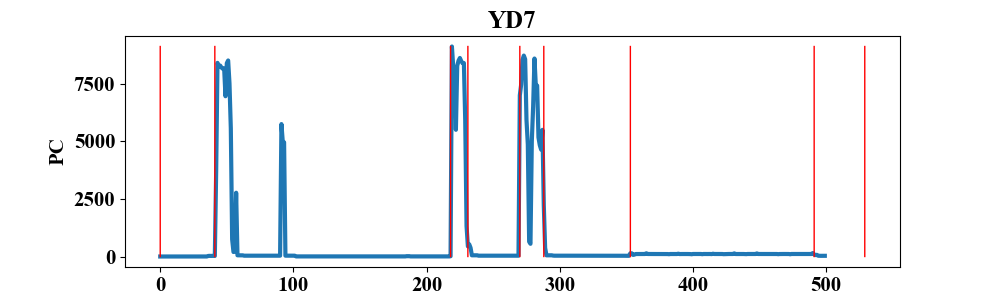

<IPython.core.display.Javascript object>


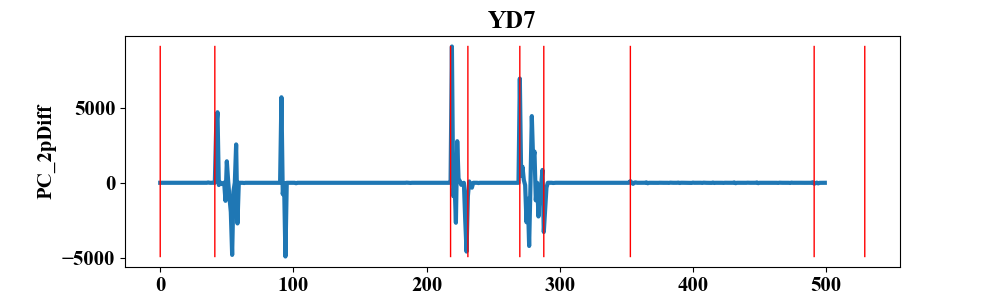

In [22]:
# template: plot_equip_feature_func(x ='time_sec',y='PC',x_lable='time [s]',y_label='PC',title='YD1',fig_s=[10,5])
figure_layout(3) # change 3 --> 1 to see inline plot with x label
fig_size = [10,3] # change 3 --> 5 to see x label
plot_equip_feature_func('time_sec',plt_features[0],'time [s]',plt_features[0],instrument,fig_size)
plot_equip_feature_func('time_sec',plt_features[1],'time [s]',plt_features[1],instrument,fig_size)
# plot_equip_feature_func(other features)

# *Find and characterize pulse section 

In [13]:
[pulse_area,pulse_trig_t,pulse_heith_t,pulse_end_t,pulse_h] = characterize_pulse(equip_data, pulse_feature, posi_thresh, nega_thresh)

In [14]:
if 0:
    plt.figure()
    plt.hist(equip_data['PC_2pDiff'].values, bins=2500,range=[-10000,10000], histtype='step', linewidth=3)
    plt.yscale('log')
    plt.show()

# *Manually find pulse in one instrument and transition

In [459]:
[op] + [0 for x in range(pulse_area_df.shape[1]-1)]

['YD7: 关闭 启动 打开', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [468]:
pulse_area_df.loc[pulse_area_df.shape[0]] = [op] + [0 for x in range(pulse_area_df.shape[1]-1)]

In [469]:
pulse_area_df

,设备操作,pulse1,pulse2,pulse3,pulse4,pulse5,pulse6,pulse7,pulse8,pulse9,pulse10
0,YD7: 关闭 启动 打开,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,YD7: 打开 切换 打印,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,YD7: 打印 切换 结束,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,YD7: 结束 切换 复印,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,YD7: 复印 切换 结束,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,YD7: 结束 切换 扫描,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,YD7: 扫描 切换 结束,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,YD7: 结束 关闭 关闭,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,YD7: 关闭 启动 打开,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,YD7: 关闭 启动 打开,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
